In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wattsquad.ml_logic import preproc
from wattsquad.ml_logic import calculations

       battery_percentage  electricity_bought_kwH  electricity_bought_NOK
count         9515.000000             9515.000000             9515.000000
mean             0.582019                4.554901                1.068755
std              0.403389               11.633544                3.601124
min              0.000000                0.000000                0.000000
25%              0.073916                0.000000                0.000000
50%              0.727313                0.000000                0.000000
75%              0.987349                0.000000                0.000000
max              1.000000              604.540688              155.947316


In [2]:
train = pd.read_csv("../../raw_data/train.csv")

In [3]:
# X_train_transformed = preproc.transform_data(train)

In [4]:
test = pd.read_csv("../../raw_data/test.csv")

In [5]:
# X_test_transformed = preproc.transform_data(test)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      9515 non-null   object 
 1   pv_production             9515 non-null   float64
 2   wind_production           9515 non-null   float64
 3   consumption               9515 non-null   float64
 4   spot_market_price         9515 non-null   float64
 5   precip_1h:mm              9515 non-null   float64
 6   precip_type:idx           9515 non-null   float64
 7   prob_precip_1h:p          9515 non-null   float64
 8   clear_sky_rad:W           9515 non-null   float64
 9   clear_sky_energy_1h:J     9515 non-null   float64
 10  diffuse_rad:W             9515 non-null   float64
 11  diffuse_rad_1h:Wh         9515 non-null   float64
 12  direct_rad:W              9515 non-null   float64
 13  direct_rad_1h:Wh          9515 non-null   float64
 14  global_r

## Describing consumption for 2022

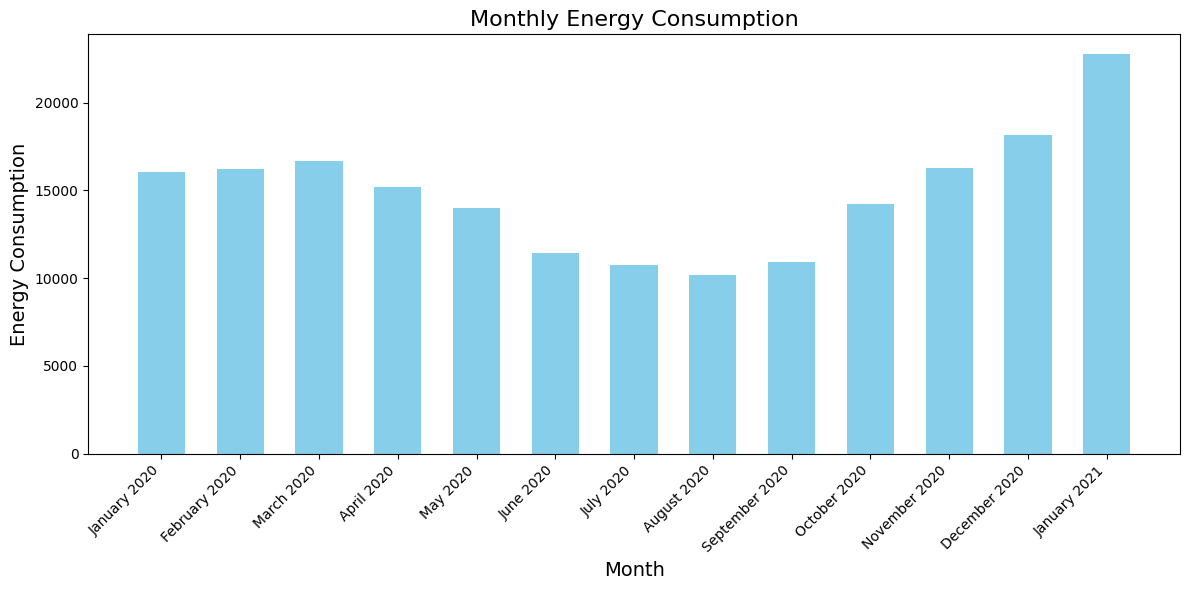

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your dataframe
# Ensure the 'time' column is in datetime format
train['time'] = pd.to_datetime(train['time'])

# Extract month and year for grouping
train['month_year'] = train['time'].dt.to_period('M')

# Aggregate consumption by month
monthly_consumption = train.groupby('month_year')['consumption'].sum().reset_index()

# Convert month_year to a datetime format for proper plotting
monthly_consumption['month_year'] = monthly_consumption['month_year'].dt.to_timestamp()

# Format the month-year column as 'January 2020', etc.
monthly_consumption['month_year_str'] = monthly_consumption['month_year'].dt.strftime('%B %Y')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_consumption['month_year_str'], monthly_consumption['consumption'], color='skyblue', width=0.6)

# Formatting the plot
plt.title('Monthly Energy Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### copy pasting load_entire_data function to get the actual consumption and actual production

In [8]:
train_data = pd.read_csv("../../raw_data/train.csv")
test_data = pd.read_csv("../../raw_data/test.csv")

# Renaming columns
train_data.rename(columns={'time': 'timestamp'}, inplace=True)
train_data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
train_data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)

test_data.rename(columns={'time': 'timestamp'}, inplace=True)
test_data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
test_data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)

# Calculating total actual_production
train_data['actual_production'] = train_data['pv_production'] + train_data['wind_production']
test_data['actual_production'] = test_data['pv_production'] + test_data['wind_production']

# Dropping irrelevant columns
train_data = train_data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price']]
test_data = test_data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price']]

In [9]:
train_data.describe()

,actual_consumption,actual_production,electricity_price
count,9515.000000,9515.000000,9515.000000
mean,20.262091,28.908694,0.127386
std,8.311275,40.967552,0.125292
min,0.048396,-581.984583,0.000000
25%,14.757704,-0.030000,0.044375
50%,18.817098,13.055833,0.090390
75%,23.716080,41.065875,0.165970
max,70.366622,258.639666,1.140590


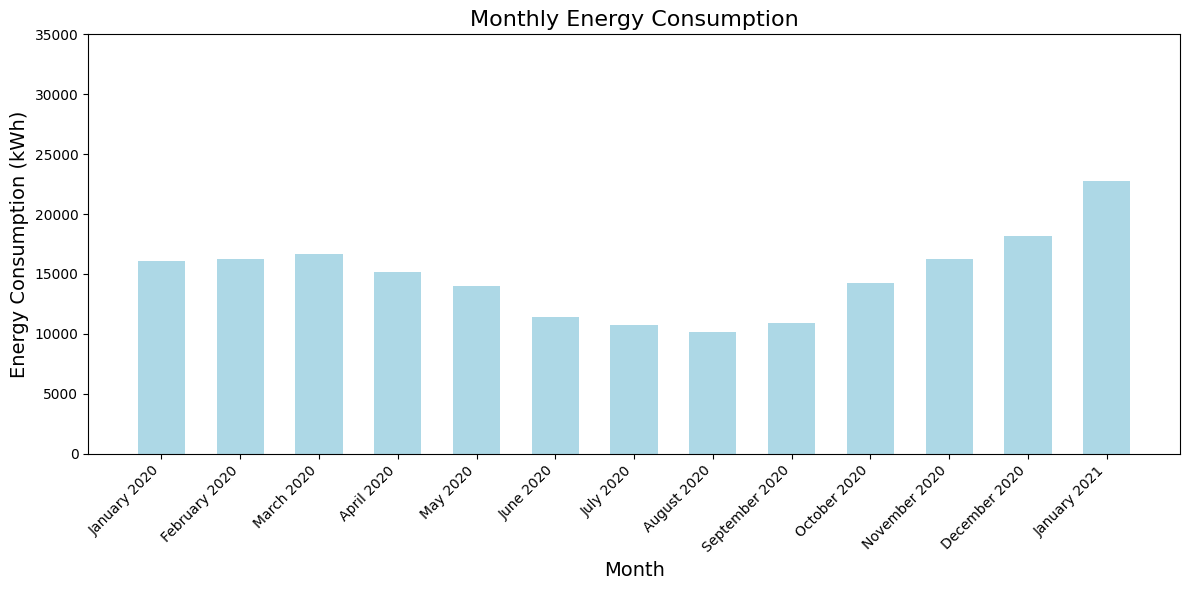

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# Extract month and year for grouping
train_data['month_year'] = train_data['timestamp'].dt.to_period('M')

# Aggregate actual consumption by month
monthly_consumption = train_data.groupby('month_year')['actual_consumption'].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_consumption['month_year'] = monthly_consumption['month_year'].dt.to_timestamp()
monthly_consumption['month_year_str'] = monthly_consumption['month_year'].dt.strftime('%B %Y')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_consumption['month_year_str'], monthly_consumption['actual_consumption'], color='lightblue', width=0.6)

# Formatting the plot
plt.title('Monthly Energy Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Consumption (kWh)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Set y-axis limit
plt.ylim(0, 35000)

# Show the plot
plt.show()


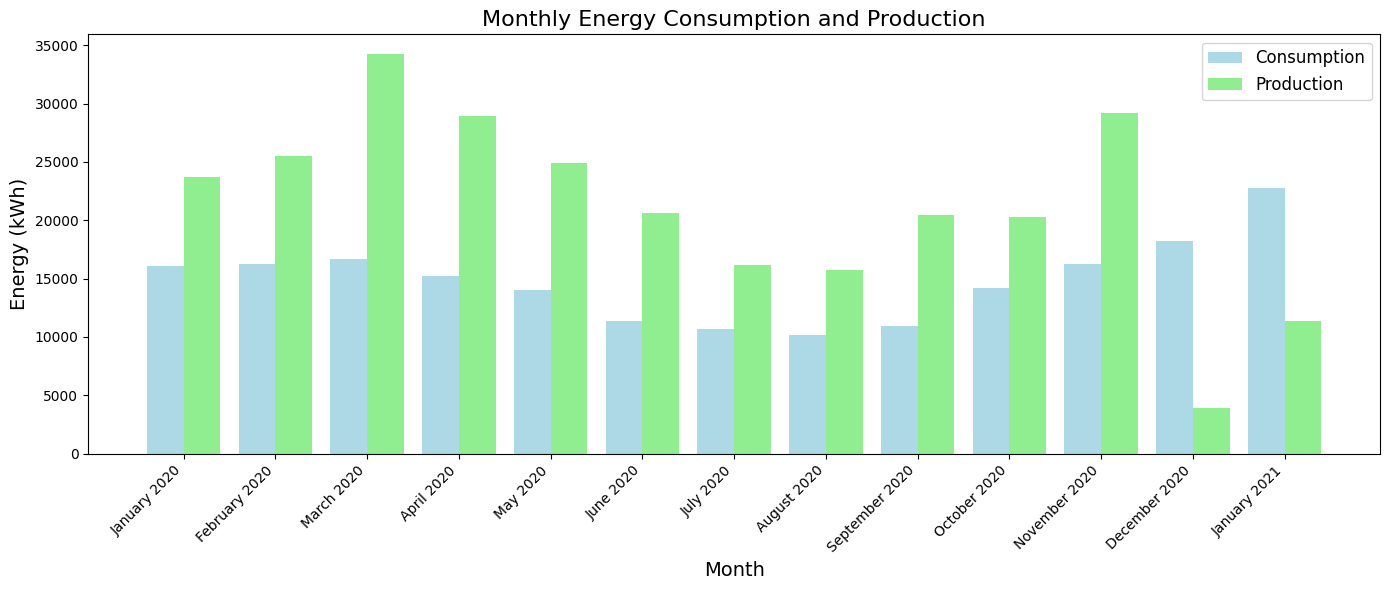

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# Extract month and year for grouping
train_data['month_year'] = train_data['timestamp'].dt.to_period('M')

# Aggregate actual consumption and production by month
monthly_data = train_data.groupby('month_year')[['actual_consumption', 'actual_production']].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data['month_year_str'] = monthly_data['month_year'].dt.strftime('%B %Y')

# Plot the data
x = range(len(monthly_data))  # Numeric x-axis positions for the months
width = 0.4  # Width of each bar

plt.figure(figsize=(14, 6))

# Plot consumption bars
plt.bar([pos - width / 2 for pos in x], monthly_data['actual_consumption'], 
        color='lightblue', width=width, label='Consumption')

# Plot production bars
plt.bar([pos + width / 2 for pos in x], monthly_data['actual_production'], 
        color='lightgreen', width=width, label='Production')

# Formatting the plot
plt.title('Monthly Energy Consumption and Production', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.xticks(x, monthly_data['month_year_str'], rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Show


### checking the same graphs for the test dataset

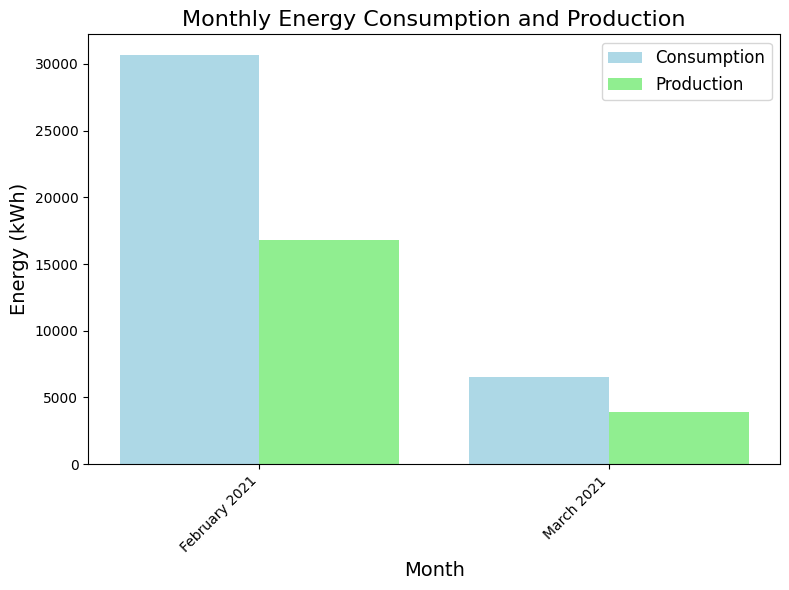

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])

# Extract month and year for grouping
test_data['month_year'] = test_data['timestamp'].dt.to_period('M')

# Aggregate actual consumption and production by month
monthly_data = test_data.groupby('month_year')[['actual_consumption', 'actual_production']].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data['month_year_str'] = monthly_data['month_year'].dt.strftime('%B %Y')

# Plot the data
x = range(len(monthly_data))  # Numeric x-axis positions for the months
width = 0.4  # Width of each bar

plt.figure(figsize=(8, 6))

# Plot consumption bars
plt.bar([pos - width / 2 for pos in x], monthly_data['actual_consumption'], 
        color='lightblue', width=width, label='Consumption')

# Plot production bars
plt.bar([pos + width / 2 for pos in x], monthly_data['actual_production'], 
        color='lightgreen', width=width, label='Production')

# Formatting the plot
plt.title('Monthly Energy Consumption and Production', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.xticks(x, monthly_data['month_year_str'], rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Show


In [13]:
train.describe()

,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,diffuse_rad:W,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9.515000e+03,9515.000000,...,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.00000,9515.000000
mean,7.654312,21.254382,20.262091,0.127386,0.066322,0.039096,3.312181,144.807325,5.213013e+05,38.549511,...,5.729207,76.279443,1.591088,4.283847,195.021703,5.633558,74.844782,1.220410,5.11671,198.633568
std,15.673519,38.225468,8.311275,0.125292,0.353434,0.239879,10.585675,232.985222,8.366789e+05,59.636149,...,6.927206,13.792720,6.265550,2.241726,81.361187,6.836455,14.001831,6.255477,2.67242,81.089361
min,0.000000,-582.200000,0.048396,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,...,-14.800000,23.400000,-16.300000,0.100000,0.100000,-14.600000,22.300000,-16.600000,0.10000,0.300000
25%,0.000000,-0.260000,14.757704,0.044375,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,...,1.200000,67.400000,-2.700000,2.500000,134.100000,1.000000,65.900000,-3.100000,3.00000,142.950000
50%,0.000000,2.370000,18.817098,0.090390,0.000000,0.000000,1.000000,0.000000,3.637200e+03,0.000000,...,4.600000,78.400000,1.200000,4.000000,190.400000,4.500000,76.800000,0.900000,4.90000,192.300000
75%,6.411375,26.040000,23.716080,0.165970,0.000000,0.000000,1.000000,220.800000,7.768631e+05,63.900000,...,10.200000,87.100000,6.400000,5.600000,265.500000,10.100000,85.700000,6.000000,6.70000,267.700000
max,79.855834,225.500000,70.366622,1.140590,6.220000,3.000000,95.000000,834.800000,3.004661e+06,320.200000,...,29.700000,100.000000,17.000000,15.300000,359.900000,29.600000,100.000000,16.500000,17.40000,359.700000


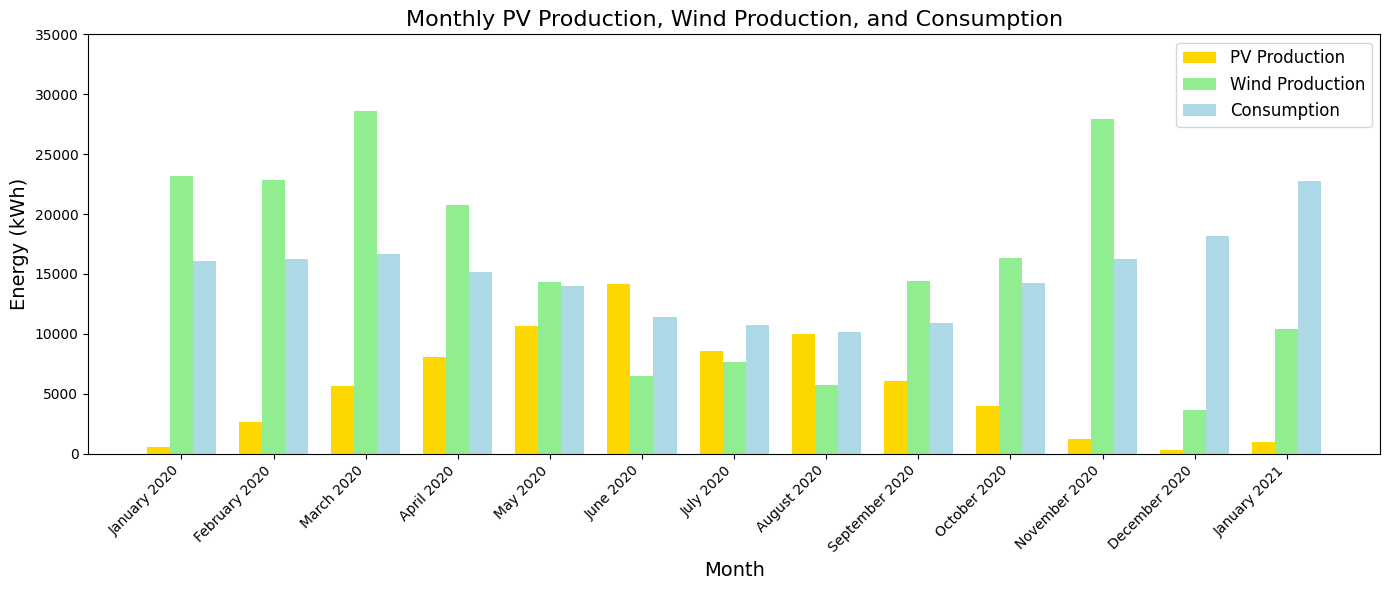

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
train['time'] = pd.to_datetime(train['time'])

# Extract month and year for grouping
train['month_year'] = train['time'].dt.to_period('M')

# Aggregate pv_production, wind_production, and consumption by month
monthly_data = train.groupby('month_year')[['pv_production', 'wind_production', 'consumption']].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data['month_year_str'] = monthly_data['month_year'].dt.strftime('%B %Y')

# Plot the data
x = range(len(monthly_data))  # Numeric x-axis positions for the months
width = 0.25  # Width of each bar

plt.figure(figsize=(14, 6))

# Plot pv_production bars
plt.bar([pos - width for pos in x], monthly_data['pv_production'], 
        color='gold', width=width, label='PV Production')

# Plot wind_production bars
plt.bar(x, monthly_data['wind_production'], 
        color='lightgreen', width=width, label='Wind Production')

# Plot consumption bars
plt.bar([pos + width for pos in x], monthly_data['consumption'], 
        color='lightblue', width=width, label='Consumption')

# Formatting the plot
plt.title('Monthly PV Production, Wind Production, and Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.xticks(x, monthly_data['month_year_str'], rotation=45, ha='right', fontsize=10)
plt.ylim(0, 35000)  # Set y-axis limit if needed
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
train.wind_production.describe()

count    9515.000000
mean       21.254382
std        38.225468
min      -582.200000
25%        -0.260000
50%         2.370000
75%        26.040000
max       225.500000
Name: wind_production, dtype: float64

In [16]:
# Find the row with the minimum value in 'wind_production'
lowest_wind_row = train.loc[train['wind_production'].idxmin()]

# Display the date and value
lowest_date = lowest_wind_row['time']
lowest_value = lowest_wind_row['wind_production']

print(f"The lowest wind production occurred on {lowest_date} with a value of {lowest_value}.")


The lowest wind production occurred on 2020-12-16 09:00:00 with a value of -582.2.


In [17]:
# Filter the rows where 'wind_production' is lower than -10
low_wind_data = train[train['wind_production'] < -10]

# Display the dates and corresponding wind production values
print(low_wind_data[['time', 'wind_production']])


                    time  wind_production
6639 2020-10-04 04:00:00          -566.34
8396 2020-12-16 09:00:00          -582.20


In [18]:
test.wind_production.describe()

count    841.000000
mean      20.086468
std       27.797933
min       -0.850000
25%       -0.260000
50%        9.440000
75%       30.890000
max      195.570000
Name: wind_production, dtype: float64

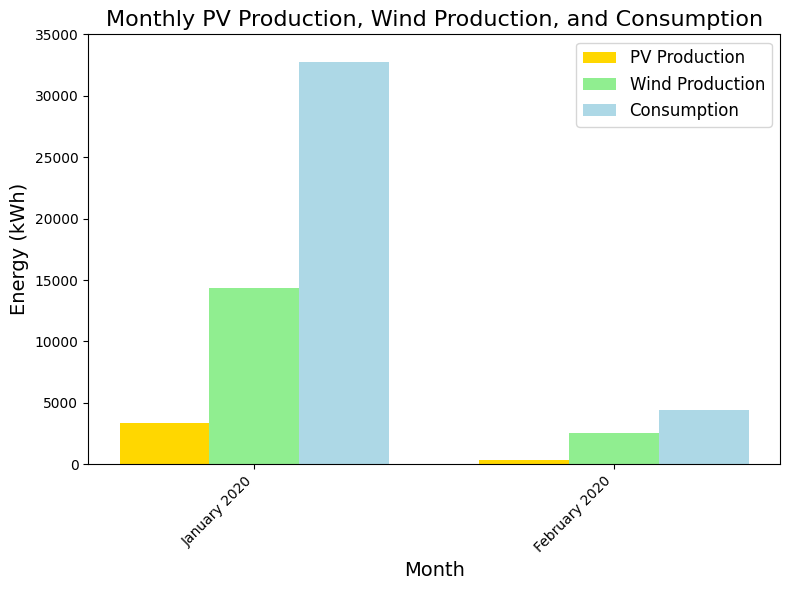

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
test['time'] = pd.to_datetime(train['time'])

# Extract month and year for grouping
test['month_year'] = test['time'].dt.to_period('M')

# Aggregate pv_production, wind_production, and consumption by month
monthly_data = test.groupby('month_year')[['pv_production', 'wind_production', 'consumption']].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data['month_year_str'] = monthly_data['month_year'].dt.strftime('%B %Y')

# Plot the data
x = range(len(monthly_data))  # Numeric x-axis positions for the months
width = 0.25  # Width of each bar

plt.figure(figsize=(8, 6))

# Plot pv_production bars
plt.bar([pos - width for pos in x], monthly_data['pv_production'], 
        color='gold', width=width, label='PV Production')

# Plot wind_production bars
plt.bar(x, monthly_data['wind_production'], 
        color='lightgreen', width=width, label='Wind Production')

# Plot consumption bars
plt.bar([pos + width for pos in x], monthly_data['consumption'], 
        color='lightblue', width=width, label='Consumption')

# Formatting the plot
plt.title('Monthly PV Production, Wind Production, and Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.xticks(x, monthly_data['month_year_str'], rotation=45, ha='right', fontsize=10)
plt.ylim(0, 35000)  # Set y-axis limit if needed
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Ensure the 'timestamp' columns in both dataframes are in datetime format
# train['time'] = pd.to_datetime(train['time'])
# test['time'] = pd.to_datetime(test['time'])

# # Combine the two dataframes
# combined_data = pd.concat([train, test])

# # Sort by timestamp to ensure proper chronological order
# combined_data = combined_data.sort_values(by='time')

# # Aggregate by month for visualization
# combined_data['month_year'] = combined_data['time'].dt.to_period('M')
# monthly_data = combined_data.groupby('month_year')[['pv_production', 'wind_production', 'consumption']].sum().reset_index()

# # Convert 'month_year' to a timestamp for plotting
# monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()

# # Plot the data
# plt.figure(figsize=(14, 6))

# # Plot PV production
# plt.plot(monthly_data['month_year'], monthly_data['pv_production'], label='PV Production', color='gold', marker='o')

# # Plot Wind production
# plt.plot(monthly_data['month_year'], monthly_data['wind_production'], label='Wind Production', color='lightgreen', marker='o')

# # Plot Consumption
# plt.plot(monthly_data['month_year'], monthly_data['consumption'], label='Consumption', color='lightblue', marker='o')

# # Formatting the plot
# plt.title('Combined Monthly PV Production, Wind Production, and Consumption (Jan 2020 - Mar 2021)', fontsize=16)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Energy (kWh)', fontsize=14)
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(fontsize=12)
# plt.tight_layout()

# # Show the plot
# plt.show()
